# Education Benefits Analysis
---


## Set Up

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import seaborn as sns

---
## Private vs Non-Private Cost vs Pay
#### (Meena)

In [2]:
dWV = pd.read_csv("Resources/Cost_And_Pay.csv")
dWV.head()

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
0,415,416 (tie),Adelphi University,"Private School, Research University",51500,90600,0.50,0.06,True,353.0,360.0,47110.0,45200.0,4.23%,92310.0,184620.0
1,885,887 (tie),Agnes Scott College,"Liberal Arts School, Private School, Religious...",42900,78300,0.55,0.21,True,342.0,339.0,47323.0,45691.0,3.57%,93014.0,186028.0
2,661,662 (tie),Alaska Pacific University,"Private School, Religious",48800,83600,NaN,0.07,True,497.0,429.0,43180.0,43180.0,0.00%,86360.0,172720.0
3,929,931 (tie),Albertus Magnus College,"Business, Private School, Religious",48500,77500,0.60,0.01,True,344.0,305.0,47302.0,46528.0,1.66%,93830.0,187660.0
4,188,189 (tie),Albion College,"Liberal Arts School, Private School, Religious",48500,101700,0.48,0.24,True,317.0,334.0,48195.0,45884.0,5.04%,94079.0,188158.0


In [3]:
#comparing top ten private vs.top ten non-private (incl.State) for Total Cost (step 1 and step 2)
#Step 1: Top Ten Private colleges based on total cost
pvt_college_List = dWV[dWV['Private']==True]                                  
topTenPvtCollege_TotalCost = pvt_college_List.sort_values('totalcost', ascending = False)[:10]

topTenPvtCollege_TotalCost 


,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
239,70,70 (tie),New York University,"Private School, Research University",58700,117000,0.42,0.17,True,8.0,7.0,63540.0,61407.0,3.47%,124947.0,249894.0
93,10,11,Dartmouth College,"Ivy League, Private School, Research Universit...",66300,140300,0.46,0.32,True,11.0,8.0,63279.0,61398.0,3.06%,124677.0,249354.0
124,105,106,Fordham University,"Private School, Religious, Research University...",54400,111300,0.38,0.09,True,9.0,10.0,63438.0,61073.0,3.87%,124511.0,249022.0
149,0,1,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",81000,155800,0.58,0.85,True,7.0,14.0,63860.0,60613.0,5.36%,124473.0,248946.0
244,94,95,Northwestern University,"Private School, Research University, For Sport...",59500,113300,0.48,0.19,True,12.0,11.0,63193.0,60840.0,3.87%,124033.0,248066.0
250,135,136 (tie),Occidental College,"Liberal Arts School, Private School",51800,107700,0.46,0.25,True,10.0,12.0,63363.0,60655.0,4.46%,124018.0,248036.0
429,66,67,Wesleyan University,"Liberal Arts School, Private School",55900,117700,0.59,0.22,True,13.0,9.0,62849.0,61167.0,2.75%,124016.0,248032.0
20,464,464 (tie),Bard College,"Liberal Arts School, Private School",48500,89000,0.49,0.00,True,14.0,17.0,62572.0,60280.0,3.80%,122852.0,245704.0
28,435,436 (tie),Bennington College,"Liberal Arts School, Private School",45800,90100,0.37,0.05,True,23.0,15.0,61920.0,60540.0,2.28%,122460.0,244920.0
355,124,124 (tie),Trinity College,"Liberal Arts School, Private School",55600,108700,0.49,0.18,True,16.0,22.0,62310.0,59865.0,4.08%,122175.0,244350.0


In [4]:
#Step 2 : Top Ten Non- Private colleges based on total cost (step 2 of 2)
NonPvt_college_List = dWV[dWV['Private']== False]
topTenNonPvtCollege_TotalCost = NonPvt_college_List.sort_values('totalcost', ascending = False)[:10]
topTenNonPvtCollege_TotalCost

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
368,167,168,University of California-Santa Cruz,"Research University, State School",53500,103800,0.45,0.37,False,145.0,111.0,56031.0,56173.0,-0.25%,112204.0,224408.0
361,29,30,University of California-Berkeley,"Research University, For Sports Fans, State Sc...",65400,130100,0.49,0.34,False,142.0,119.0,56197.0,55766.0,0.77%,111963.0,223926.0
367,60,60 (tie),University of California-Santa Barbara,"Party School, Research University, For Sports ...",54900,118800,0.47,0.28,False,133.0,136.0,56929.0,54945.0,3.61%,111874.0,223748.0
362,107,108,University of California-Davis,"Research University, For Sports Fans, State Sc...",56700,110900,0.53,0.37,False,147.0,134.0,55944.0,55046.0,1.63%,110990.0,221980.0
364,80,81,University of California-Los Angeles,"Research University, For Sports Fans, State Sc...",57500,114800,0.47,0.31,False,160.0,140.0,55294.0,54810.0,0.88%,110104.0,220208.0
365,139,140 (tie),University of California-Riverside,"Research University, For Sports Fans, State Sc...",51600,107400,0.44,0.33,False,161.0,144.0,55116.0,54475.0,1.18%,109591.0,219182.0
363,59,60 (tie),University of California-Irvine,"Research University, For Sports Fans, State Sc...",54900,118800,0.48,0.32,False,192.0,171.0,53382.0,52906.0,0.90%,106288.0,212576.0
366,41,42,University of California-San Diego,"Engineering, Research University, State School",58600,124900,0.53,0.54,False,193.0,170.0,53348.0,52906.0,0.84%,106254.0,212508.0
382,158,158 (tie),University of Michigan-Ann Arbor,"Research University, For Sports Fans, State Sc...",59300,104600,0.46,0.38,False,188.0,183.0,53490.0,51976.0,2.91%,105466.0,210932.0
401,61,62 (tie),University of Virginia-Main Campus,"Research University, For Sports Fans, State Sc...",59500,118400,0.48,0.21,False,189.0,190.0,53461.0,51337.0,4.14%,104798.0,209596.0


In [5]:
#Comparing top ten private vs. top ten non-private (incl. State) for Early-career_Pay (step 1 of 2)
# step 1

pvt_college_List = dWV[dWV['Private']==True]  

topTenPvtCollege_EaryCareerPay = pvt_college_List.sort_values('Early_Career_Pay', ascending = False)[:10]

topTenPvtCollege_EaryCareerPay
#topTenPvtCollege_Early_CareerPay

#comparing top ten private vs. top ten non-private (incl. state) for Mid-Career_pay


,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
210,2,3,Massachusetts Institute of Technology,"Engineering, Private School, Research University",81500,147000,0.53,0.69,True,93.0,95.0,59020.0,57010.0,3.53%,116030.0,232060.0
149,0,1,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",81000,155800,0.58,0.85,True,7.0,14.0,63860.0,60613.0,5.36%,124473.0,248946.0
45,6,7,California Institute of Technology,"Engineering, Private School, Research University",78800,142500,0.52,0.97,True,96.0,109.0,58755.0,56382.0,4.21%,115137.0,230274.0
335,9,10,Stanford University,"Private School, Research University, For Sport...",73300,140400,0.56,0.49,True,56.0,51.0,60749.0,58846.0,3.23%,119595.0,239190.0
289,39,40,Rose-Hulman Institute of Technology,"Engineering, Private School",71600,125900,0.51,0.98,True,128.0,128.0,57138.0,55413.0,3.11%,112551.0,225102.0
51,37,38,Carnegie Mellon University,"Engineering, Private School, Research University",70900,126400,0.46,0.64,True,20.0,26.0,62032.0,59710.0,3.89%,121742.0,243484.0
425,13,14,Webb Institute,"Engineering, Private School",70800,138200,NaN,1.00,True,26.0,1959.0,61820.0,18520.0,233.80%,80340.0,160680.0
337,16,17,Stevens Institute of Technology,"Engineering, Private School, Research University",70800,136900,0.50,0.80,True,59.0,40.0,60554.0,59260.0,2.18%,119814.0,239628.0
268,1,2,Princeton University,"Ivy League, Private School, Research Universit...",69800,147800,0.44,0.47,True,150.0,141.0,55832.0,54780.0,1.92%,110612.0,221224.0
148,8,9,Harvard University,"Ivy League, Private School, Research Universit...",69200,140700,0.56,0.19,True,72.0,92.0,59950.0,57050.0,5.08%,117000.0,234000.0


In [6]:
#topTenNon-PvtCollege_Early_CareerPay (step 2 of 2)
NonPvt_college_List = dWV[dWV['Private']== False]
topTenNonPvtCollege_EaryCareerPay = NonPvt_college_List.sort_values('Early_Career_Pay', ascending = False)[:10]
topTenNonPvtCollege_EaryCareerPay



,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
83,17,18,Colorado School of Mines,"Engineering, Research University, State School",71900,136100,0.60,0.94,False,371.0,384.0,46533.0,44531.0,4.50%,91064.0,182128.0
361,29,30,University of California-Berkeley,"Research University, For Sports Fans, State Sc...",65400,130100,0.49,0.34,False,142.0,119.0,56197.0,55766.0,0.77%,111963.0,223926.0
415,44,45,Virginia Military Institute,"Liberal Arts School, For Sports Fans, State Sc...",62200,124600,0.66,0.43,False,366.0,375.0,46630.0,44694.0,4.33%,91324.0,182648.0
236,54,54 (tie),New Jersey Institute of Technology,"Engineering, Research University, For Sports F...",60800,119700,0.52,0.71,False,440.0,415.0,44540.0,43590.0,2.18%,88130.0,176260.0
401,61,62 (tie),University of Virginia-Main Campus,"Research University, For Sports Fans, State Sc...",59500,118400,0.48,0.21,False,189.0,190.0,53461.0,51337.0,4.14%,104798.0,209596.0
382,158,158 (tie),University of Michigan-Ann Arbor,"Research University, For Sports Fans, State Sc...",59300,104600,0.46,0.38,False,188.0,183.0,53490.0,51976.0,2.91%,105466.0,210932.0
379,117,117 (tie),University of Illinois at Urbana-Champaign,"Party School, Research University, For Sports ...",58600,109600,0.46,0.37,False,484.0,452.0,43468.0,42706.0,1.78%,86174.0,172348.0
366,41,42,University of California-San Diego,"Engineering, Research University, State School",58600,124900,0.53,0.54,False,193.0,170.0,53348.0,52906.0,0.84%,106254.0,212508.0
364,80,81,University of California-Los Angeles,"Research University, For Sports Fans, State Sc...",57500,114800,0.47,0.31,False,160.0,140.0,55294.0,54810.0,0.88%,110104.0,220208.0
403,122,122 (tie),University of Washington-Seattle Campus,"Research University, For Sports Fans, State Sc...",57300,108800,0.53,0.32,False,369.0,414.0,46608.0,43621.0,6.85%,90229.0,180458.0


In [7]:
#comparing top ten private vs. top ten non-private (incl. state) for Mid-Career_pay(step 1 of 2)
#Step 1 of 2
pvt_college_List = dWV[dWV['Private']==True]  

topTenPvtCollege_MidCareerPay = pvt_college_List.sort_values('Mid-Career_Pay', ascending = False)[:10]

topTenPvtCollege_MidCareerPay

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
149,0,1,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",81000,155800,0.58,0.85,True,7.0,14.0,63860.0,60613.0,5.36%,124473.0,248946.0
268,1,2,Princeton University,"Ivy League, Private School, Research Universit...",69800,147800,0.44,0.47,True,150.0,141.0,55832.0,54780.0,1.92%,110612.0,221224.0
210,2,3,Massachusetts Institute of Technology,"Engineering, Private School, Research University",81500,147000,0.53,0.69,True,93.0,95.0,59020.0,57010.0,3.53%,116030.0,232060.0
45,6,7,California Institute of Technology,"Engineering, Private School, Research University",78800,142500,0.52,0.97,True,96.0,109.0,58755.0,56382.0,4.21%,115137.0,230274.0
19,7,8,Babson College,"Business, Private School",66600,141700,0.34,0.00,True,60.0,61.0,60504.0,58450.0,3.51%,118954.0,237908.0
148,8,9,Harvard University,"Ivy League, Private School, Research Universit...",69200,140700,0.56,0.19,True,72.0,92.0,59950.0,57050.0,5.08%,117000.0,234000.0
335,9,10,Stanford University,"Private School, Research University, For Sport...",73300,140400,0.56,0.49,True,56.0,51.0,60749.0,58846.0,3.23%,119595.0,239190.0
93,10,11,Dartmouth College,"Ivy League, Private School, Research Universit...",66300,140300,0.46,0.32,True,11.0,8.0,63279.0,61398.0,3.06%,124677.0,249354.0
439,11,12,Williams College,"Liberal Arts School, Private School",62000,138400,0.44,0.33,True,25.0,33.0,61850.0,59412.0,4.10%,121262.0,242524.0
425,13,14,Webb Institute,"Engineering, Private School",70800,138200,NaN,1.00,True,26.0,1959.0,61820.0,18520.0,233.80%,80340.0,160680.0


In [8]:
#topTenNon-PvtCollege_Early_CareerPay (step 2 of 2)
NonPvt_college_List = dWV[dWV['Private']== False]
topTenNonPvtCollege_MidCareerPay = NonPvt_college_List.sort_values('Mid-Career_Pay', ascending = False)[:10]
topTenNonPvtCollege_MidCareerPay

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
83,17,18,Colorado School of Mines,"Engineering, Research University, State School",71900,136100,0.60,0.94,False,371.0,384.0,46533.0,44531.0,4.50%,91064.0,182128.0
361,29,30,University of California-Berkeley,"Research University, For Sports Fans, State Sc...",65400,130100,0.49,0.34,False,142.0,119.0,56197.0,55766.0,0.77%,111963.0,223926.0
366,41,42,University of California-San Diego,"Engineering, Research University, State School",58600,124900,0.53,0.54,False,193.0,170.0,53348.0,52906.0,0.84%,106254.0,212508.0
415,44,45,Virginia Military Institute,"Liberal Arts School, For Sports Fans, State Sc...",62200,124600,0.66,0.43,False,366.0,375.0,46630.0,44694.0,4.33%,91324.0,182648.0
236,54,54 (tie),New Jersey Institute of Technology,"Engineering, Research University, For Sports F...",60800,119700,0.52,0.71,False,440.0,415.0,44540.0,43590.0,2.18%,88130.0,176260.0
367,60,60 (tie),University of California-Santa Barbara,"Party School, Research University, For Sports ...",54900,118800,0.47,0.28,False,133.0,136.0,56929.0,54945.0,3.61%,111874.0,223748.0
363,59,60 (tie),University of California-Irvine,"Research University, For Sports Fans, State Sc...",54900,118800,0.48,0.32,False,192.0,171.0,53382.0,52906.0,0.90%,106288.0,212576.0
401,61,62 (tie),University of Virginia-Main Campus,"Research University, For Sports Fans, State Sc...",59500,118400,0.48,0.21,False,189.0,190.0,53461.0,51337.0,4.14%,104798.0,209596.0
364,80,81,University of California-Los Angeles,"Research University, For Sports Fans, State Sc...",57500,114800,0.47,0.31,False,160.0,140.0,55294.0,54810.0,0.88%,110104.0,220208.0
80,101,102,College of William and Mary,"Research University, For Sports Fans, State Sc...",54400,111900,0.44,0.20,False,228.0,223.0,51306.0,49712.0,3.21%,101018.0,202036.0


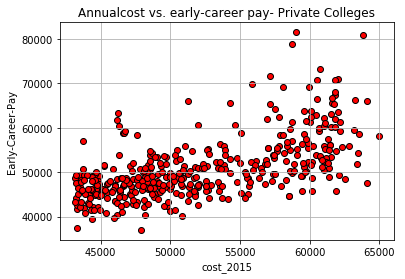

In [9]:
# scatter plot based on cost_2015 vs. early-career pay (all private college and all public colleges)
#Rationale is since early career pay is early we are trying to see recent available annual cost,which is 2015 cost
#3 steps
#step 1- Pvt colleges cost vs. early career pay (x= cost_2015, y= Early_Career_Pay )


pvt_college_List = dWV[dWV['Private']==True]  

fig, ax = plt.subplots()

plt.scatter(pvt_college_List.cost_2015, pvt_college_List.Early_Career_Pay , 
            facecolor= "red", 
            edgecolors="black", 
            label='',
            marker='o')
          
plt.title("Annualcost vs. early-career pay- Private Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Early-Career-Pay")
ax.grid(True)


# Save Figure
plt.savefig('Images/pvtCostVsEarlycareerPay.png', bbox_inches = "tight")

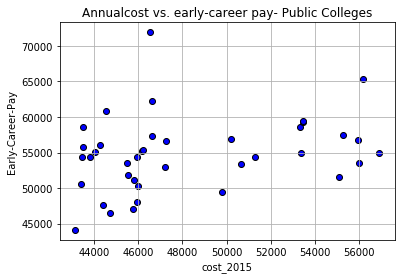

In [10]:
#step 2- non- Pvt colleges cost vs. early career pay (x= cost_2015, y= Early_Career_Pay )NonPvt_college_List = dWV[dWV['Private']== False]
fig, ax = plt.subplots()

plt.scatter(NonPvt_college_List.cost_2015, NonPvt_college_List.Early_Career_Pay , 
            facecolor= "Blue", 
            edgecolors="black", 
            label='',
            marker='o')
            
plt.title("Annualcost vs. early-career pay- Public Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Early-Career-Pay")
ax.grid(True)


# Save Figure
plt.savefig('Images/non_pvtCostVsEarlycareerPay.png', bbox_inches = "tight")


In [11]:
#scatter plot based on cost vs. mid-career pay ( 3 steps)

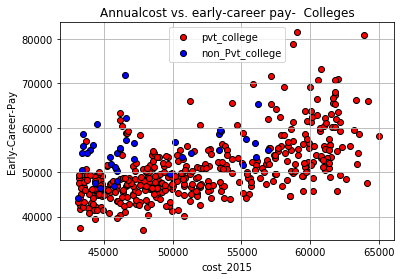

In [12]:
#step 3 _ Combined of step 1 and step2 -plotting both in one graph (pvt and non-private annual cost vs. early carrer pay)
x = range(40000,70000,2000)
y = range(40000,90000,5000)
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(pvt_college_List.cost_2015, pvt_college_List.Early_Career_Pay , 
            facecolor= "red", 
            edgecolors="black", 
            label='pvt_college',
            marker='o')
ax1.scatter(NonPvt_college_List.cost_2015, NonPvt_college_List.Early_Career_Pay , 
            facecolor= "Blue", 
            edgecolors="black", 
            label='non_Pvt_college',
            marker='o')
plt.title("Annualcost vs. early-career pay-  Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Early-Career-Pay")
plt.legend(loc= 'upper center');
plt.grid()
plt.savefig('Images/combo_CostVsEarlycareerPay.png', bbox_inches = "tight")
plt.show()

### Observations:
- the availability of data is very less for non-pvt colleges vs pvt colleges
- The observation is based on the availability of the data.

- pvt colleges- mostly the annual cost you pay, you get back that as your early career pay (annual)
- most of them are in the range of early $40,000s to mid $50,000s

- non pvt college including but not limited to State school, naval academy, military school etc. the cost of non- private schools are
- comparitively lesser than the private schools.
- There is no real trend and it is less evenly distributed

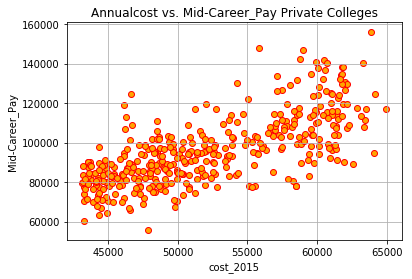

In [13]:
# scatter plot based on cost_2015 vs. mid-career pay (all private college and all public colleges)
#Rationale is since early career pay is early we are trying to see recent available annual cost,which is 2015 cost
#3 steps
#step 1- Pvt colleges cost vs. mid career pay (x= cost_2015, y= Mid-Career_Pay )

pvt_college_List = dWV[dWV['Private']==True]  

fig, ax = plt.subplots()
# first convert Mid-career_Pay to readable here, we are putting at as list, then for uniformity doing it on cost 2015 also.
plt.scatter(pvt_college_List["cost_2015"].tolist(), pvt_college_List["Mid-Career_Pay"].tolist(),
            facecolor= "orange", 
            edgecolors="Red", 
            label='',
            marker='o')
           
plt.title("Annualcost vs. Mid-Career_Pay Private Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Mid-Career_Pay")
ax.grid(True)


# Save Figure
plt.savefig('Images/pvtCostVsMidCareerPay.png', bbox_inches = "tight")

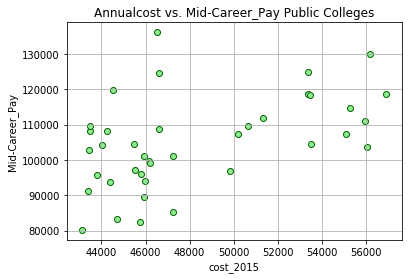

In [14]:
#step 2-Non Pvt colleges cost vs. Mid-career-pay (x= cost_2015, y= Mid-Career_Pay )

NonPvt_college_List = dWV[dWV['Private']== False]
fig, ax = plt.subplots()

plt.scatter(NonPvt_college_List["cost_2015"].tolist(), NonPvt_college_List["Mid-Career_Pay"].tolist(),
            facecolor= "lightgreen", 
            edgecolors="darkgreen", 
            label='',
            marker='o')
            
plt.title("Annualcost vs. Mid-Career_Pay Public Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Mid-Career_Pay")
ax.grid(True)


# Save Figure
plt.savefig('Images/NonpvtCostVsMidCareerPay.png', bbox_inches = "tight")


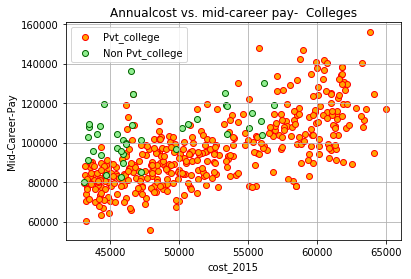

In [15]:
#step 3 _ Combined of step 1 and step2 -plotting both in one graph (pvt and non-private annual cost vs. Mid career pay)
x = range(40000,70000,2000)
y = range(70000,140000,10000)
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(pvt_college_List["cost_2015"].tolist(), pvt_college_List["Mid-Career_Pay"].tolist(),
            facecolor= "orange", 
            edgecolors="Red", 
            label='Pvt_college',
            marker='o')
ax1.scatter(NonPvt_college_List["cost_2015"].tolist(), NonPvt_college_List["Mid-Career_Pay"].tolist(),
            facecolor= "lightgreen", 
            edgecolors="darkgreen",
            label='Non Pvt_college',
            marker='o')
            
plt.title("Annualcost vs. mid-career pay-  Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Mid-Career-Pay")
plt.legend(loc='best');
plt.grid()

plt.savefig('Images/combo_CostVsMidcareerPay.png', bbox_inches = "tight")
plt.show()

### Observations
- mid career pay is the same trend as the early career pay for  pvt colleges
- The scale of mid career pay is double the pay of early career pay

- non-public trend is the same as early career. there is no trend.
- however, the scale is double for mid career pay.



---
## Is there a relationship between STEM Majors and Pay?
#### (rohit)

In [16]:
graduate_data = pd.read_csv("Resources/payscaleAlumni.csv")
graduate_data.head()

,Rank,School Name,School Type,Early Career Pay,Mid-Career Pay,% High Meaning,% STEM Degrees
0,1,Stanford University,"Private School, Research University, For Sport...",77200,154700,0.60,0.49
1,2,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",82400,153400,0.59,0.85
2,3 (tie),California Institute of Technology,"Engineering, Private School, Research University",82000,152400,0.58,0.97
3,3 (tie),Massachusetts Institute of Technology,"Engineering, Private School, Research University",84300,152400,0.57,0.69
4,5,Princeton University,"Ivy League, Private School, Research Universit...",71000,151900,0.51,0.47


In [17]:
# % STEM Degrees = % degrees awarded in science, technology, engineering or math subjects
# Our question: Do STEM degrees pay more than non-STEM degrees both in the short-term and long-term? 
# Dataset: "Payscale Alumni"
# group_names = ["Not STEM (0-25%)", "Moderately STEM (25-50%)", "Mostly STEM (50-75%)", "STEM (75-100%)"]
bins = [0, 0.25, 0.5, 0.75, 1]
group_names = ["0-25%", "25-50%", "50-75%", "75-100%"]
graduate_data["% STEM"] = pd.cut(graduate_data["% STEM Degrees"], bins, labels = group_names)
graduate_data.head()

,Rank,School Name,School Type,Early Career Pay,Mid-Career Pay,% High Meaning,% STEM Degrees,% STEM
0,1,Stanford University,"Private School, Research University, For Sport...",77200,154700,0.60,0.49,25-50%
1,2,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",82400,153400,0.59,0.85,75-100%
2,3 (tie),California Institute of Technology,"Engineering, Private School, Research University",82000,152400,0.58,0.97,75-100%
3,3 (tie),Massachusetts Institute of Technology,"Engineering, Private School, Research University",84300,152400,0.57,0.69,50-75%
4,5,Princeton University,"Ivy League, Private School, Research Universit...",71000,151900,0.51,0.47,25-50%


In [18]:
agg_df = graduate_data.groupby("% STEM")
early_career_median = agg_df["Early Career Pay"].median()

In [19]:
mid_career_median = agg_df["Mid-Career Pay"].median()

In [20]:
summary_df = pd.DataFrame({"Early Career Pay (Median)": early_career_median, 
                           "Mid-Career Pay (Median)": mid_career_median})

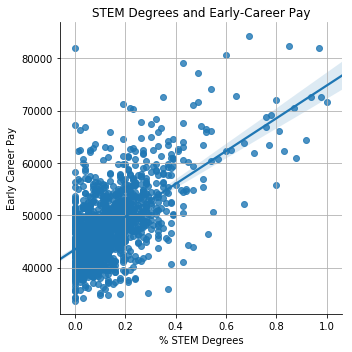

In [21]:
#Scatter plots for % STEM vs. Early & Mid-Career Pay
#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#palletes = "coral"
sns.lmplot(x='% STEM Degrees',y='Early Career Pay', data=graduate_data, fit_reg=True) 
plt.title("STEM Degrees and Early-Career Pay")
plt.grid()
plt.tight_layout()
plt.savefig("Images/STEM Degrees and Early-Career Pay (Seaborn).png")
plt.show()

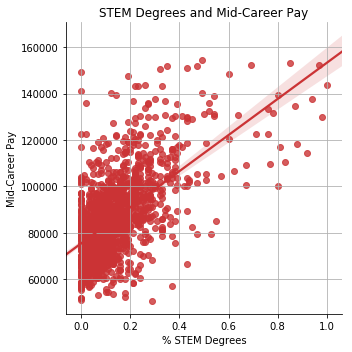

In [22]:
import seaborn as sns
sns.set_palette("Set1", 8, .75)
sns.lmplot(x='% STEM Degrees',y='Mid-Career Pay',data=graduate_data,fit_reg=True) 
plt.title("STEM Degrees and Mid-Career Pay")
plt.grid()
plt.tight_layout()
plt.savefig("Images/STEM Degrees and Mid-Career Pay (Seaborn).png")

plt.show()

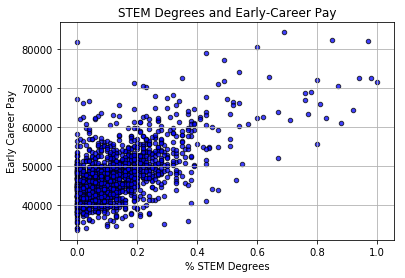

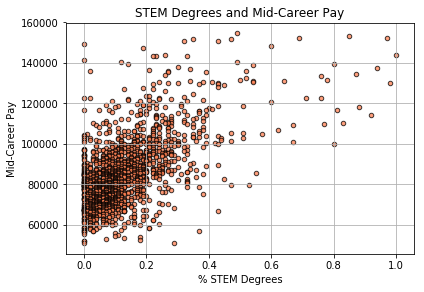

In [23]:
ax1 = graduate_data.plot.scatter(x = "% STEM Degrees", y = "Early Career Pay", 
                            color = "blue", alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("STEM Degrees and Early-Career Pay")
plt.savefig("Images/STEM Degrees and Early-Career Pay.png")
plt.show()

ax2 = graduate_data.plot.scatter(x = "% STEM Degrees", y = "Mid-Career Pay", 
                            color = "coral", alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.tight_layout()
plt.title("STEM Degrees and Mid-Career Pay")
plt.savefig("Images/STEM Degrees and Mid-Career Pay.png")
plt.show()


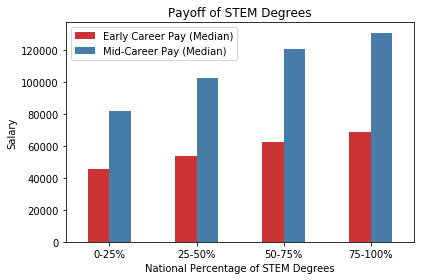

In [24]:
#Bar graph
bar_chart = summary_df.plot(kind = "bar")
plt.title("Payoff of STEM Degrees")
plt.xlabel("National Percentage of STEM Degrees")
plt.ylabel("Salary")
plt.xticks(rotation=0)
#plt.grid()
plt.tight_layout()
plt.savefig("Images/Payoff of STEM Degrees.png")
plt.show()

---
## How important are School types?
#### (kychien)

In [25]:
# Data file paths
bach_source = "Resources/payscaleBachelors.csv"
alum_source = "Resources/payscaleAlumni.csv"
assc_source = "Resources/payscaleAssoc.csv"
degpay_source = "Resources/degrees-that-pay-back.csv"
empay_source = "Resources/early_mid_pay.csv"

In [26]:
# Open source files
raw_bach = pd.read_csv(bach_source)
raw_alum = pd.read_csv(alum_source)
raw_assc = pd.read_csv(assc_source)
raw_alum.count()

Rank                1530
School Name         1530
School Type         1530
Early Career Pay    1530
Mid-Career Pay      1530
% High Meaning      1428
% STEM Degrees      1529
dtype: int64

In [27]:
# Extract relevant info
base_bach = raw_bach[['School Name', 'School Type', 'Early Career Pay', 'Mid-Career Pay', '% STEM Degrees']]
base_alum = raw_alum[['School Name', 'Early Career Pay', 'Mid-Career Pay']]
base_assc = raw_assc[['School Name', 'School Sector', 'Early Career Pay', 'Mid-Career Pay', '% STEM Degrees']]


# Merge Alum and Bach data
comb_alum = pd.merge(base_bach, base_alum, on="School Name", how="left", suffixes=("", " BS Plus"))

# Fix merged school type null values
#comb_alum["School Type BS Only"] = comb_alum["School Type BS Only"].fillna(comb_alum["School Type BS Plus"])
# Fix merged % STEM null values
#comb_alum["% STEM Degrees BS Only"] = comb_alum["% STEM Degrees BS Only"].fillna(comb_alum["% STEM Degrees BS Plus"])

# Find difference between Alum and Bach data
comb_alum["EC Pay Growth"] = comb_alum["Early Career Pay BS Plus"] - comb_alum["Early Career Pay"]
comb_alum["EC Pay Pct"] = comb_alum["EC Pay Growth"] / comb_alum["Early Career Pay"]
comb_alum["MC Pay Growth"] = comb_alum["Mid-Career Pay BS Plus"] - comb_alum["Mid-Career Pay"]
comb_alum["MC Pay Pct"] = comb_alum["MC Pay Growth"] / comb_alum["Mid-Career Pay"]

#display(comb_alum)
comb_alum.isna().sum()

School Name                 0
School Type                 0
Early Career Pay            0
Mid-Career Pay              0
% STEM Degrees              1
Early Career Pay BS Plus    2
Mid-Career Pay BS Plus      2
EC Pay Growth               2
EC Pay Pct                  2
MC Pay Growth               2
MC Pay Pct                  2
dtype: int64

In [28]:
# Strip out School Type Data
#comb_alum["Private"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Private" in s)
#comb_alum["State"] = comb_alum.loc[:, "School Type"].apply(lambda s:"State" in s)
#comb_alum["Ivy League"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Ivy League" in s)
#comb_alum["Sports"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Sports" in s)
#comb_alum["Religious"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Religious" in s)
#comb_alum["Research"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Research" in s)
#comb_alum["Engineering"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Engineering" in s)


In [29]:
# Create slices of data based on School Types
privt_data = comb_alum[comb_alum["School Type"].str.contains("Private") == True]
state_data = comb_alum[comb_alum["School Type"].str.contains("State") == True]
ivylg_data = comb_alum[comb_alum["School Type"].str.contains("Ivy League") == True]
sport_data = comb_alum[comb_alum["School Type"].str.contains("Sport") == True]
relig_data = comb_alum[comb_alum["School Type"].str.contains("Religious") == True]
rsrch_data = comb_alum[comb_alum["School Type"].str.contains("Research") == True]
engnr_data = comb_alum[comb_alum["School Type"].str.contains("Engineering") == True]
lbart_data = comb_alum[comb_alum["School Type"].str.contains("Liberal Arts") == True]
busin_data = comb_alum[comb_alum["School Type"].str.contains("Business") == True]

In [30]:
display(sport_data.count())

School Name                 350
School Type                 350
Early Career Pay            350
Mid-Career Pay              350
% STEM Degrees              350
Early Career Pay BS Plus    350
Mid-Career Pay BS Plus      350
EC Pay Growth               350
EC Pay Pct                  350
MC Pay Growth               350
MC Pay Pct                  350
dtype: int64

---
### Level of Education

In [31]:
# Find the mean/median for assoc, bach, and alum data
trip_data = [base_assc, base_bach, base_alum]
trip_lbls = ["Associates", "Bachelors", "Bachelors Plus"]
trip_aecp = [i["Early Career Pay"].mean() for i in trip_data]
trip_amcp = [i["Mid-Career Pay"].mean() for i in trip_data]
trip_mecp = [i["Early Career Pay"].median() for i in trip_data]
trip_mmcp = [i["Mid-Career Pay"].median() for i in trip_data]


In [32]:
# Find the mean/median for top 15 schools for assoc, bach, and alum data
t15_data = [base_assc.head(15), base_bach.head(15), base_alum.head(15)]
t15_aecp = [i["Early Career Pay"].mean() for i in t15_data]
t15_amcp = [i["Mid-Career Pay"].mean() for i in t15_data]
t15_mecp = [i["Early Career Pay"].median() for i in t15_data]
t15_mmcp = [i["Mid-Career Pay"].median() for i in t15_data]

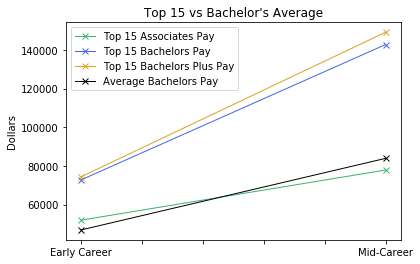

In [33]:
# Create common plot point data
x = [5, 10]
clr = ["mediumseagreen", "royalblue", "goldenrod"]

# Holder for the various plots
t15_plt = []

# Plot the various data for associates, etc...
for i in np.arange(3):
    name = "Top 15 "+trip_lbls[i]+" Pay"
    t15_plt.append(plt.plot(x, [t15_aecp[i], t15_amcp[i]], label=name,
                        linewidth=1, marker="x", color=clr[i]))

# Average bachelors data for comparison
y = [trip_aecp[1], trip_amcp[1]]
t15_plt.append(plt.plot(x, y, linewidth=1, marker="x", color="black", label="Average Bachelors Pay"))

# Add labels and legend
leg = plt.legend(loc="upper left")
plt.xticks(np.arange(5,11), ["Early Career","","","","","Mid-Career"])
yAxisLbl = plt.ylabel("Dollars")
ttl = plt.title("Top 15 vs Bachelor's Average")

---
### School Type Factors
#### Ivy League

In [34]:
# Get a subset of overall data for calculations
ivylg_strip = ivylg_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
ivylg_summ = pd.DataFrame(ivylg_strip.mean(), columns=["Mean"])

# Add in SEM
ivylg_summ["SEM"] = ivylg_strip.sem()

# Add median info
ivylg_summ["Median"] = ivylg_strip.median()

ivylg_summ

,Mean,SEM,Median
Early Career Pay,66850.000000,769.972170,66550.000000
Mid-Career Pay,134537.500000,2895.374236,133450.000000
Early Career Pay BS Plus,68887.500000,806.986790,69300.000000
Mid-Career Pay BS Plus,141475.000000,3121.226293,143250.000000
EC Pay Growth,2037.500000,248.522419,2000.000000
EC Pay Pct,0.030504,0.003709,0.029534
MC Pay Growth,6937.500000,1013.117096,6250.000000
MC Pay Pct,0.051634,0.007445,0.047167
% STEM Degrees,0.318750,0.036569,0.310000


#### Private Schools

In [35]:
# Get a subset of overall data for calculations
privt_strip = privt_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
privt_summ = pd.DataFrame(privt_strip.mean(), columns=["Mean"])

# Add in SEM
privt_summ["SEM"] = privt_strip.sem()

# Add median info
privt_summ["Median"] = privt_strip.median()

privt_summ

,Mean,SEM,Median
Early Career Pay,46758.829787,228.408683,45700.000000
Mid-Career Pay,83960.531915,577.577681,80450.000000
Early Career Pay BS Plus,47751.705757,235.489554,46600.000000
Mid-Career Pay BS Plus,86373.773987,618.491222,82600.000000
EC Pay Growth,986.993603,21.338704,900.000000
EC Pay Pct,0.021061,0.000445,0.019473
MC Pay Growth,2412.153518,75.971703,2000.000000
MC Pay Pct,0.027473,0.000785,0.025238
% STEM Degrees,0.124266,0.004414,0.080000


#### State Schools

In [36]:
# Get a subset of overall data for calculations
state_strip = state_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
state_summ = pd.DataFrame(state_strip.mean(), columns=["Mean"])

# Add in SEM
state_summ["SEM"] = state_strip.sem()

# Add median info
state_summ["Median"] = state_strip.median()

state_summ

,Mean,SEM,Median
Early Career Pay,47097.359155,259.962142,46200.000000
Mid-Career Pay,83850.704225,604.457405,82350.000000
Early Career Pay BS Plus,47882.570423,266.119407,47000.000000
Mid-Career Pay BS Plus,85882.746479,633.189645,84000.000000
EC Pay Growth,785.211268,20.090878,700.000000
EC Pay Pct,0.016655,0.000388,0.015689
MC Pay Growth,2032.042254,60.074352,1900.000000
MC Pay Pct,0.023764,0.000654,0.022545
% STEM Degrees,0.155750,0.005449,0.120000


#### Religious Schools

In [37]:
# Get a subset of overall data for calculations
relig_strip = relig_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
relig_summ = pd.DataFrame(relig_strip.mean(), columns=["Mean"])

# Add in SEM
relig_summ["SEM"] = relig_strip.sem()

# Add median info
relig_summ["Median"] = relig_strip.median()

relig_summ

,Mean,SEM,Median
Early Career Pay,44822.321429,221.459068,44600.000000
Mid-Career Pay,79191.071429,592.428630,78200.000000
Early Career Pay BS Plus,45750.358423,226.969046,45500.000000
Mid-Career Pay BS Plus,81257.526882,630.625818,79800.000000
EC Pay Growth,925.089606,23.970790,900.000000
EC Pay Pct,0.020730,0.000542,0.019512
MC Pay Growth,2081.720430,78.286360,1900.000000
MC Pay Pct,0.025609,0.000914,0.024724
% STEM Degrees,0.100643,0.003459,0.080000


#### Research Schools

In [38]:
# Get a subset of overall data for calculations
rsrch_strip = rsrch_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
rsrch_summ = pd.DataFrame(rsrch_strip.mean(), columns=["Mean"])

# Add in SEM
rsrch_summ["SEM"] = rsrch_strip.sem()

# Add median info
rsrch_summ["Median"] = rsrch_strip.median()

rsrch_summ

,Mean,SEM,Median
Early Career Pay,51586.513158,401.809119,50200.000000
Mid-Career Pay,95723.026316,967.627269,92950.000000
Early Career Pay BS Plus,52647.368421,419.638756,51050.000000
Mid-Career Pay BS Plus,98702.960526,1045.716173,95650.000000
EC Pay Growth,1060.855263,30.860400,900.000000
EC Pay Pct,0.020241,0.000496,0.018080
MC Pay Growth,2979.934211,116.693693,2600.000000
MC Pay Pct,0.029888,0.000941,0.027759
% STEM Degrees,0.212697,0.009224,0.180000


#### Engineering Schools

In [39]:
# Get a subset of overall data for calculations
engnr_strip = engnr_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
engnr_summ = pd.DataFrame(engnr_strip.mean(), columns=["Mean"])

# Add in SEM
engnr_summ["SEM"] = engnr_strip.sem()

# Add median info
engnr_summ["Median"] = engnr_strip.median()

engnr_summ

,Mean,SEM,Median
Early Career Pay,64725.714286,1397.737324,63900.000000
Mid-Career Pay,119300.000000,3053.217066,119700.000000
Early Career Pay BS Plus,65942.857143,1490.977265,65800.000000
Mid-Career Pay BS Plus,123011.428571,3122.684073,122800.000000
EC Pay Growth,1217.142857,175.254231,1000.000000
EC Pay Pct,0.018176,0.002327,0.016032
MC Pay Growth,3711.428571,366.582478,3900.000000
MC Pay Pct,0.031342,0.002789,0.032566
% STEM Degrees,0.707429,0.026677,0.690000


#### Sports Schools

In [40]:
# Get a subset of overall data for calculations
sport_strip = sport_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
sport_summ = pd.DataFrame(sport_strip.mean(), columns=["Mean"])

# Add in SEM
sport_summ["SEM"] = sport_strip.sem()

# Add median info
sport_summ["Median"] = sport_strip.median()

sport_summ

,Mean,SEM,Median
Early Career Pay,50322.571429,350.462319,49300.000000
Mid-Career Pay,93702.285714,899.844523,91600.000000
Early Career Pay BS Plus,51374.857143,366.459521,50300.000000
Mid-Career Pay BS Plus,96519.714286,958.854182,94400.000000
EC Pay Growth,1052.285714,30.190170,900.000000
EC Pay Pct,0.020656,0.000490,0.018411
MC Pay Growth,2817.428571,98.108333,2500.000000
MC Pay Pct,0.029215,0.000824,0.027511
% STEM Degrees,0.182914,0.005878,0.160000


#### Business Schools

In [41]:
# Get a subset of overall data for calculations
busin_strip = busin_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
busin_summ = pd.DataFrame(busin_strip.mean(), columns=["Mean"])

# Add in SEM
busin_summ["SEM"] = busin_strip.sem()

# Add median info
busin_summ["Median"] = busin_strip.median()

busin_summ

,Mean,SEM,Median
Early Career Pay,47224.444444,918.107163,45400.000000
Mid-Career Pay,82477.777778,2544.623742,78000.000000
Early Career Pay BS Plus,47988.888889,924.209858,46100.000000
Mid-Career Pay BS Plus,84546.666667,2708.935085,79600.000000
EC Pay Growth,764.444444,80.349964,700.000000
EC Pay Pct,0.016372,0.001711,0.014516
MC Pay Growth,2068.888889,248.811767,1800.000000
MC Pay Pct,0.023904,0.002458,0.022727
% STEM Degrees,0.055111,0.010601,0.020000


#### Liberal Arts Schools

In [42]:
# Get a subset of overall data for calculations
lbart_strip = lbart_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
lbart_summ = pd.DataFrame(lbart_strip.mean(), columns=["Mean"])

# Add in SEM
lbart_summ["SEM"] = lbart_strip.sem()

# Add median info
lbart_summ["Median"] = lbart_strip.median()

lbart_summ

,Mean,SEM,Median
Early Career Pay,47934.272300,464.378171,47100.000000
Mid-Career Pay,90892.488263,1262.029441,88200.000000
Early Career Pay BS Plus,49348.341232,491.078312,48500.000000
Mid-Career Pay BS Plus,94554.976303,1354.203918,91800.000000
EC Pay Growth,1376.777251,52.389573,1300.000000
EC Pay Pct,0.028473,0.001004,0.027350
MC Pay Growth,3591.943128,205.909989,2800.000000
MC Pay Pct,0.038711,0.002076,0.035264
% STEM Degrees,0.208451,0.007393,0.200000


In [43]:
# Function to return y values for bar chart out of list of dataframes
def dfsToY(lists, ylbl, xlbl):
    return [i.loc[xlbl, ylbl] for i in lists]

In [44]:
# Prep data for bar charts
type_dfs = [privt_summ, state_summ, engnr_summ, rsrch_summ, ivylg_summ, busin_summ, 
            lbart_summ, sport_summ, relig_summ]
type_lbls = ["Private", "State", "Engineering", "Research", "Ivy League", "Business", 
             "Liberal Arts", "Sports", "Religious"]
type_clrs = ["royalblue", "mediumseagreen", "goldenrod", "plum", "firebrick", "lightskyblue", 
             "lightpink","wheat", "lightsteelblue"]
x = np.arange(len(type_lbls))

In [45]:
type_ecp = dfsToY(type_dfs, "Mean", "Early Career Pay")
type_mcp = dfsToY(type_dfs, "Mean", "Mid-Career Pay")
type_pecp = dfsToY(type_dfs, "Mean", "Early Career Pay BS Plus")
type_pmcp = dfsToY(type_dfs, "Mean", "Mid-Career Pay BS Plus")

In [46]:
type_pst = dfsToY(type_dfs, "Mean", "% STEM Degrees")
type_pst = [i*100 for i in type_pst]

In [47]:
sem_ecp = dfsToY(type_dfs, "SEM", "Early Career Pay")
sem_mcp = dfsToY(type_dfs, "SEM", "Mid-Career Pay")
sem_pecp = dfsToY(type_dfs, "SEM", "Early Career Pay BS Plus")
sem_pmcp = dfsToY(type_dfs, "SEM", "Mid-Career Pay BS Plus")

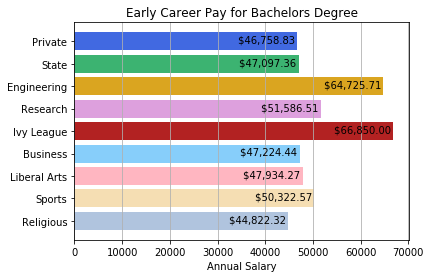

In [48]:
# Early Career Pay Comparisons
ecp_bar = plt.barh(x, type_ecp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Early Career Pay for Bachelors Degree")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
for i in ecp_bar.patches:
    w = i.get_width()
    plt.text(w-12500, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/EarlyCareerPayBSOnly.png", bbox_inches="tight")

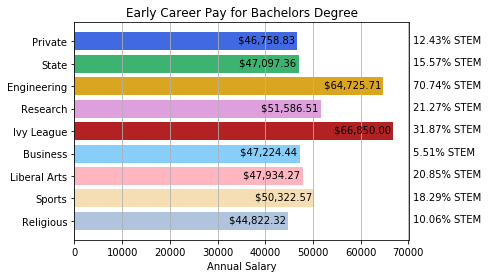

In [49]:
# Early Career Pay Comparisons
ecp_bar_wSTEM = plt.barh(x, type_ecp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Early Career Pay for Bachelors Degree")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
z = 0
for i in ecp_bar.patches:
    w = i.get_width()
    plt.text(w-12500, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")
    plt.text(71000, i.get_y()+.47, ("{:,.2f}% STEM".format(type_pst[z])), fontsize=10, color="black")
    z += 1

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/EarlyCareerPayBSOnlySTEM.png", bbox_inches="tight")

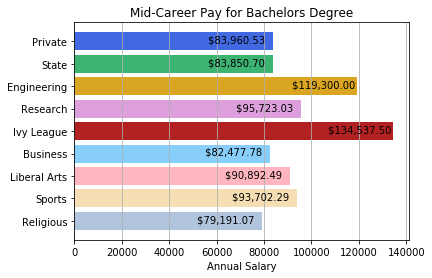

In [50]:
# Mid-Career Pay Comparisons
mcp_bar = plt.barh(x, type_mcp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Mid-Career Pay for Bachelors Degree")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
for i in mcp_bar.patches:
    w = i.get_width()
    plt.text(w-27400, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/MidCareerPayBSOnly.png", bbox_inches="tight")

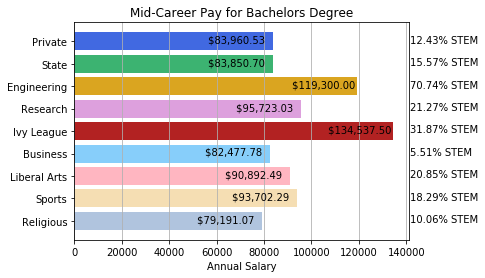

In [51]:
# Mid-Career Pay Comparisons
mcp_bar = plt.barh(x, type_mcp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Mid-Career Pay for Bachelors Degree")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
z = 0
for i in mcp_bar.patches:
    w = i.get_width()
    plt.text(w-27400, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")
    plt.text(141500, i.get_y()+.47, ("{:,.2f}% STEM".format(type_pst[z])), fontsize=10, color="black")
    z += 1
    
# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/MidCareerPayBSOnlySTEM.png", bbox_inches="tight")

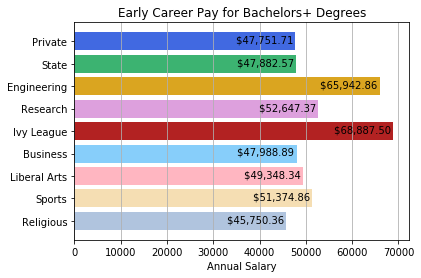

In [52]:
# Early Career Pay Comparisons
pecp_bar = plt.barh(x, type_pecp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Early Career Pay for Bachelors+ Degrees")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
for i in pecp_bar.patches:
    w = i.get_width()
    plt.text(w-12800, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/EarlyCareerPayBSPlus.png", bbox_inches="tight")

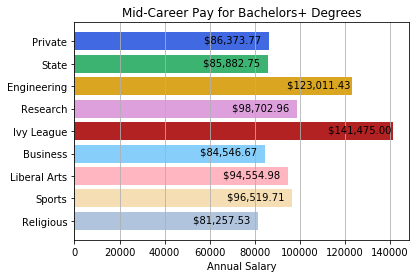

In [53]:
# Mid-Career Pay Comparisons
pmcp_bar = plt.barh(x, type_pmcp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Mid-Career Pay for Bachelors+ Degrees")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
for i in pmcp_bar.patches:
    w = i.get_width()
    plt.text(w-28800, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/MidCareerPayBSPlus.png", bbox_inches="tight")

---
## What are the best/worst majors for ROI?
#### (Harita)

In [54]:
# Read in data
associateDegreesDF = pd.read_csv('Resources/degrees-that-pay-back.csv', encoding ='cp1252')
earlyMidPayDF= pd.read_csv('Resources/early_mid_pay.csv', encoding ='cp1252')

In [55]:
#check data from each file
associateDegreesDF.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [56]:
earlyMidPayDF.head()

,Rank,Major,Degree Type,Early Career Pay,Mid Career Pay
0,1,Petroleum Engineering,Bachelor's,"$94,600","$175,500"
1,2,Actuarial Mathematics,Bachelor's,"$56,400","$131,700"
2,3,Actuarial Science,Bachelor's,"$61,200","$130,800"
3,4,Nuclear Engineering,Bachelor's,"$69,000","$127,500"
4,5,Chemical Engineering,Bachelor's,"$70,300","$124,500"


In [57]:
# UGMajor = "Petroleum Engineering", "Actuarial Mathematics", "Actuarial Science", "Nuclear Engineering", "Chemical Engineering "
# MidCareerPay = 175000, 131700, 130800, 127500, 124500
# x_axis = np.arange(len(UGMajor))
new_df = pd.DataFrame({"Major": earlyMidPayDF["Major"], "Mid Career Pay": earlyMidPayDF["Mid Career Pay"]})
new_df['Mid_Career_Pay_Numeric'] = new_df['Mid Career Pay'].replace('[\$,]', '', regex=True).astype(float)
new_df.head()

,Major,Mid Career Pay,Mid_Career_Pay_Numeric
0,Petroleum Engineering,"$175,500",175500.0
1,Actuarial Mathematics,"$131,700",131700.0
2,Actuarial Science,"$130,800",130800.0
3,Nuclear Engineering,"$127,500",127500.0
4,Chemical Engineering,"$124,500",124500.0


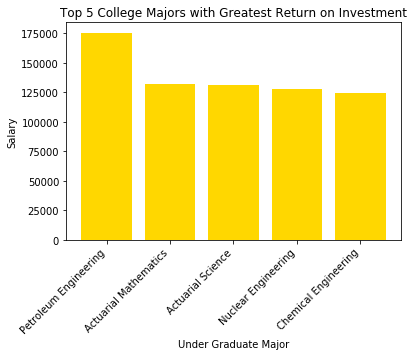

In [58]:
# Create the ticks for our bar chart's x axis
# Give the chart a title, x label, and y label
#Create a new DF 
Top5_df = new_df.sort_values('Mid_Career_Pay_Numeric', ascending = False)[:5]
Top5_df
x_axis = np.arange(0, len(Top5_df.Major))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Top 5 College Majors with Greatest Return on Investment")
plt.xlabel("Under Graduate Major")
plt.ylabel("Salary")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Top5_df.Major, rotation = 45, horizontalalignment="right")
plt.bar(x_axis, Top5_df.Mid_Career_Pay_Numeric, color="gold", align="center")

plt.savefig('Images/GreatestRoi.png', bbox_inches="tight")
plt.show()

### Observations:
- based on the available data the top 5 college majors 
- with the greatest Return on investment are from Petroleum Engineering 
- Actuarial Math, Actuarial Science, Nucler Engineering and Chemical Engineering. 
- One thing we noticed was that the majors 
- apart from Petroluim Engineering, has a relatively even distribution. They all range around the salary of \$125,000. 


In [59]:
new_df1 = pd.DataFrame({"Major": earlyMidPayDF["Major"], "Mid Career Pay": earlyMidPayDF["Mid Career Pay"]})
new_df1['Mid_Career_Pay_Numeric'] = new_df1['Mid Career Pay'].replace('[\$,]', '', regex=True).astype(float)
#new_df1
new_df2 = new_df1.sort_values('Mid_Career_Pay_Numeric', ascending = True)[:5]
new_df2



,Major,Mid Career Pay,Mid_Career_Pay_Numeric
488,Early Childhood Education,"$40,400",40400.0
487,Child & Family Studies,"$42,100",42100.0
486,Veterinary Technology,"$43,100",43100.0
485,Early Childhood & Elementary Education,"$43,600",43600.0
484,Child Development,"$44,000",44000.0


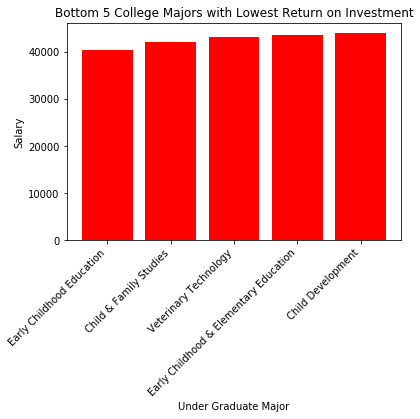

In [60]:
# Create the ticks for our bar chart's x axis
# Give the chart a title, x label, and y label
Bottom5_df = new_df2.sort_values('Mid_Career_Pay_Numeric')
Bottom5_df 
x_axis1 = np.arange(0, len(Bottom5_df.Major))
tick_locations = []
for x in x_axis1:
    tick_locations.append(x)
plt.title("Bottom 5 College Majors with Lowest Return on Investment")
plt.xlabel("Under Graduate Major")
plt.ylabel("Salary")
tick_locations = [value for value in x_axis1]
tick_locations
plt.xticks(tick_locations, Bottom5_df.Major, rotation = 45, horizontalalignment="right")
plt.bar(x_axis1, Bottom5_df.Mid_Career_Pay_Numeric, color="red", align="center")

plt.savefig('Images/LeastRoi.png', bbox_inches="tight")
plt.show()

### Observations
- The college majors with the lowest return on investment are..
- The bottom 5 are very similar in terms of the field in that they 
- are all having to do with earyl childhood education/ development with the exception of veterinary technology.
- There is a significant difference between the pay scales of the top 5 and bottom 5 majors (\$175,000 to \$40,000 - \$135,000).
- All bottom five seem to be very close in pay, ranging around \$40,000.

In [61]:
# get the undergraduate majors with best potential for increase
# track percent change of majors with biggest percent change
# Rank top 10 jumps in salary
top10CareerJumps = associateDegreesDF.sort_values('Percent change from Starting to Mid-Career Salary', ascending = False)
top10CareerJumps[:10]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
37,Math,"$45,400.00","$92,400.00",103.5,"$45,200.00","$64,200.00","$128,000.00","$183,000.00"
42,Philosophy,"$39,900.00","$81,200.00",103.5,"$35,500.00","$52,800.00","$127,000.00","$168,000.00"
33,International Relations,"$40,900.00","$80,900.00",97.8,"$38,200.00","$56,000.00","$111,000.00","$157,000.00"
17,Economics,"$50,100.00","$98,600.00",96.8,"$50,600.00","$70,600.00","$145,000.00","$210,000.00"
36,Marketing,"$40,800.00","$79,600.00",95.1,"$42,100.00","$55,600.00","$119,000.00","$175,000.00"
44,Physics,"$50,300.00","$97,300.00",93.4,"$56,000.00","$74,200.00","$132,000.00","$178,000.00"
45,Political Science,"$40,800.00","$78,200.00",91.7,"$41,200.00","$55,300.00","$114,000.00","$168,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"
34,Journalism,"$35,600.00","$66,700.00",87.4,"$38,400.00","$48,300.00","$97,700.00","$145,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [62]:
# get the undergraduate majors with least potential for increase
# track percent change of majors with least percent change
# Rank bottom 10 jumps in salary
bottom10CareerJumps = associateDegreesDF.sort_values('Percent change from Starting to Mid-Career Salary', ascending = True)
bottom10CareerJumps[:10]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
43,Physician Assistant,"$74,300.00","$91,700.00",23.4,"$66,400.00","$75,200.00","$108,000.00","$124,000.00"
40,Nursing,"$54,200.00","$67,000.00",23.6,"$47,600.00","$56,400.00","$80,900.00","$98,300.00"
41,Nutrition,"$39,900.00","$55,300.00",38.6,"$33,900.00","$44,500.00","$70,500.00","$99,200.00"
32,Interior Design,"$36,100.00","$53,200.00",47.4,"$35,700.00","$42,600.00","$72,500.00","$107,000.00"
18,Education,"$34,900.00","$52,000.00",49.0,"$29,300.00","$37,900.00","$73,400.00","$102,000.00"
29,Hospitality & Tourism,"$37,800.00","$57,500.00",52.1,"$35,500.00","$43,600.00","$81,900.00","$124,000.00"
31,Information Technology (IT),"$49,100.00","$74,800.00",52.3,"$44,500.00","$56,700.00","$96,700.00","$129,000.00"
47,Religion,"$34,100.00","$52,000.00",52.5,"$29,700.00","$36,500.00","$70,900.00","$96,400.00"
39,Music,"$35,900.00","$55,000.00",53.2,"$26,700.00","$40,200.00","$88,000.00","$134,000.00"
49,Spanish,"$34,000.00","$53,100.00",56.2,"$31,000.00","$40,000.00","$76,800.00","$96,400.00"


In [63]:
# biggest difference on top and bottom half
# difference between 10th nd 90th percentiles
# add 2 columns to represent number values for percentiles
associateDegreesDF['MidCareer10thNumber'] = associateDegreesDF['Mid-Career 10th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
associateDegreesDF['MidCareer90thNumber'] = associateDegreesDF['Mid-Career 90th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
associateDegreesDF['10th90thDiff'] = associateDegreesDF['MidCareer90thNumber'] - associateDegreesDF['MidCareer10thNumber']
associateDegreesDF.sort_values('10th90thDiff', ascending = False)[:10]
#associateDegreesDF

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,MidCareer10thNumber,MidCareer90thNumber,10th90thDiff
17,Economics,"$50,100.00","$98,600.00",96.8,"$50,600.00","$70,600.00","$145,000.00","$210,000.00",50600.0,210000.0,159400.0
22,Finance,"$47,900.00","$88,300.00",84.3,"$47,200.00","$62,100.00","$128,000.00","$195,000.00",47200.0,195000.0,147800.0
37,Math,"$45,400.00","$92,400.00",103.5,"$45,200.00","$64,200.00","$128,000.00","$183,000.00",45200.0,183000.0,137800.0
36,Marketing,"$40,800.00","$79,600.00",95.1,"$42,100.00","$55,600.00","$119,000.00","$175,000.00",42100.0,175000.0,132900.0
42,Philosophy,"$39,900.00","$81,200.00",103.5,"$35,500.00","$52,800.00","$127,000.00","$168,000.00",35500.0,168000.0,132500.0
45,Political Science,"$40,800.00","$78,200.00",91.7,"$41,200.00","$55,300.00","$114,000.00","$168,000.00",41200.0,168000.0,126800.0
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00",71900.0,194000.0,122100.0
44,Physics,"$50,300.00","$97,300.00",93.4,"$56,000.00","$74,200.00","$132,000.00","$178,000.00",56000.0,178000.0,122000.0
33,International Relations,"$40,900.00","$80,900.00",97.8,"$38,200.00","$56,000.00","$111,000.00","$157,000.00",38200.0,157000.0,118800.0
16,Drama,"$35,900.00","$56,900.00",58.5,"$36,700.00","$41,300.00","$79,100.00","$153,000.00",36700.0,153000.0,116300.0


In [64]:
UGMajor = "Economics", "Finance", "Math", "Marketing", "Philosophy", "Political Science", "Chemical Engineering", "Physics", "International Relations", "Drama"


In [65]:
#careers with least variance between top and bottom
#careers with least variance between top and bottom
associateDegreesDF.sort_values('10th90thDiff')[:10]


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,MidCareer10thNumber,MidCareer90thNumber,10th90thDiff
40,Nursing,"$54,200.00","$67,000.00",23.6,"$47,600.00","$56,400.00","$80,900.00","$98,300.00",47600.0,98300.0,50700.0
43,Physician Assistant,"$74,300.00","$91,700.00",23.4,"$66,400.00","$75,200.00","$108,000.00","$124,000.00",66400.0,124000.0,57600.0
41,Nutrition,"$39,900.00","$55,300.00",38.6,"$33,900.00","$44,500.00","$70,500.00","$99,200.00",33900.0,99200.0,65300.0
49,Spanish,"$34,000.00","$53,100.00",56.2,"$31,000.00","$40,000.00","$76,800.00","$96,400.00",31000.0,96400.0,65400.0
27,Health Care Administration,"$38,800.00","$60,600.00",56.2,"$34,600.00","$45,600.00","$78,800.00","$101,000.00",34600.0,101000.0,66400.0
47,Religion,"$34,100.00","$52,000.00",52.5,"$29,700.00","$36,500.00","$70,900.00","$96,400.00",29700.0,96400.0,66700.0
23,Forestry,"$39,100.00","$62,600.00",60.1,"$41,000.00","$49,300.00","$78,200.00","$111,000.00",41000.0,111000.0,70000.0
32,Interior Design,"$36,100.00","$53,200.00",47.4,"$35,700.00","$42,600.00","$72,500.00","$107,000.00",35700.0,107000.0,71300.0
18,Education,"$34,900.00","$52,000.00",49.0,"$29,300.00","$37,900.00","$73,400.00","$102,000.00",29300.0,102000.0,72700.0
15,Criminal Justice,"$35,000.00","$56,300.00",60.9,"$32,200.00","$41,600.00","$80,700.00","$107,000.00",32200.0,107000.0,74800.0


In [66]:
#convert median salary to number
associateDegreesDF['Mid-CareerMeanNumber'] = associateDegreesDF['Mid-Career Median Salary'].replace('[\$,]', '', regex=True).astype(float)

In [67]:
#descriptive statistics
#variance
associateDegreesDF['Mid-CareerMeanNumber'].var()

258836738.7755102

In [68]:
#standard deviation
associateDegreesDF['Mid-CareerMeanNumber'].std()

16088.403860405488